# Exemplary VAME analysis pipeline for unsupervised identificatin of behavior structure

see **(C) Luxem et al. 2020** preprint here (https://www.biorxiv.org/content/10.1101/2020.05.14.095430v1) and Github code here (https://github.com/LINCellularNeuroscience/VAME). Follow installatino instructions to install vame, cuda, pytorch etc.

In [143]:
import vame
import numpy as np
import pandas as pd

In [144]:
# set working directory to create new vame project
working_directory = 'D:\\VAME'
project = 'Emoface_kNN_GMM'
# import raw videos from previous deeplabcur project
videos = ['D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo_camA.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo_camB.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo2_camA.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo2_camB.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo3_camA.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo3_camB.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\setup_camA.avi',
          'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\setup_camB.avi']

VAME starts by initializing a new project. This will create a folder with your project name + the current date. Within this folder four sub-folder gets created and a config.yaml file.

In [145]:
# Initialize your project
# Step 1:
config = vame.init_new_project(project=project, videos=videos, working_directory=working_directory, videotype='.avi')

Created "D:\VAME\Emoface_kNN_GMM-Nov10-2020\videos"
Created "D:\VAME\Emoface_kNN_GMM-Nov10-2020\data"
Created "D:\VAME\Emoface_kNN_GMM-Nov10-2020\results"
Created "D:\VAME\Emoface_kNN_GMM-Nov10-2020\model"
Copying the videos 

A VAME project has been created. 

Next use vame.create_trainset(config) to split your data into a train and test set. 
Afterwards you can use vame.rnn_model() to train the model on your data.


In [146]:
# After the inital creation of your project you can always access the config.yaml file 
config = 'D:\\VAME\Emoface_kNN_GMM-Nov10-2020\\config.yaml'
# The config.yaml file is essential for your VAME project as you can set all the necessary parameter in here.

In [147]:
# import poses from previous deeplabcur project
files = ['D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo_camADLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo_camBDLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo2_camADLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo2_camBDLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo3_camADLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\emo3_camBDLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\setup_camADLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',
        'D:\\DeeplabCut\\EmoFace-Guillermo-2020-10-20\\videos\\setup_camBDLC_resnet50_EmoFaceOct20shuffle1_1030000.csv',]

# these save_dir have been created in step 1, one for each video imported to the project
save_dir = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo_camA',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo_camB',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo2_camA',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo2_camB',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo3_camA',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo3_camB',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\setup_camA',
            'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\setup_camB']

filenames = save_dir
for i in range(len(files)):
    filenames[i] = save_dir[i] + '\\' + save_dir[i][40:] +'-PE-seq.npy'
filenames

['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo_camA\\emo_camA-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo_camB\\emo_camB-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo2_camA\\emo2_camA-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo2_camB\\emo2_camB-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo3_camA\\emo3_camA-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\emo3_camB\\emo3_camB-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\setup_camA\\setup_camA-PE-seq.npy',
 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\data\\setup_camB\\setup_camB-PE-seq.npy']

In [148]:
def egocentric_trafo(data):
    """
    This function loads a 2 dimensional numpy array and transforms positional x,y coordinates relative to ref_x and ref_y. 
    For EmoFace data bodyparts are centered erlative to nose bone
    """
    # egocentric data nose in columns x=24 y=25
    ref_x = data[24,:].copy()
    ref_y = data[25,:].copy()

    for column in range(len(data)):
        if (column % 2) == 0:
            data[column,:] = data[column,:]-ref_y
        else:
            data[column,:] = data[column,:]-ref_x
    return data;
        

def csv_to_numpy(files, filenames):
    """
    This is a demo function to show how a conversion from the resulting pose-estimation.csv file
    to a numpy array can be implemented. 
    Note that this code is only useful for data which is a priori egocentric, i.e. head-fixed
    or otherwise restrained animals. 
    """
    for i in range(len(files)):
        
        # Read in your .csv file, skip the first two rows and create a numpy array
        data = pd.read_csv(files[i], skiprows = 2)
        data_mat = pd.DataFrame.to_numpy(data)
        data_mat = data_mat[:,1:] 
    
        # get the number of bodyparts, their x,y-position and the confidence from DeepLabCut
        bodyparts = int(np.size(data_mat[0,:]) / 3)
        positions = []
        confidence = []
        idx = 0
        for k in range(bodyparts):
            positions.append(data_mat[:,idx:idx+2])
            confidence.append(data_mat[:,idx+2])
            idx += 3
    
        body_position = np.concatenate(positions, axis=1)
        con_arr = np.array(confidence)
        
        # transform egocentric coordinates
        ego_body_position = egocentric_trafo(body_position)
    
        # find low confidence and set them to NaN (vame.create_trainset(config) will interpolate these NaNs)
        body_position_nan = []
        idx = -1
        for j in range(bodyparts*2):
            if j % 2 == 0:
                idx +=1
            seq = ego_body_position[:,j]
            seq[con_arr[idx,:]<.99] = np.NaN
            body_position_nan.append(seq)

        final_positions = np.array(body_position_nan)
        
        # save the final_positions array with np.save()
        np.save(filenames[i], final_positions)
    return

# create npy files from deeplabcut csv
csv_to_numpy(files, filenames)

In your project you find a sub-folder called data. Here, you can put your egocentric aligned pose estimation file for every video within its folder. Please make sure its named correctly, e.g. videoname-PE-seq.npy. Afterwards, you can call the function vame.create_trainset(config) which will create the training set for the recurrent neural network in "/Your-VAME-Project-Apr30-2020/data/train/...". Note that vame.create_trainset(config) will linear interpolate every NaN in your pose estimation NumPy file and save it in your data folder as data/video-1/video-1-PE-seq-clean.npy. This file will be accessed later on from vame.behavior_segmentation() to segment your pose data.

In [149]:
# Align your behavior videos egocentric and create training dataset:
# Make sure to put them into the data folder for every video. The name of this file is the video name + -PE-seq.npy: 
# E.g.: /Your-VAME-Project/data/video-1/video-1-PE-seq.npy
vame.create_trainset(config)

Creating training dataset.
Lenght of train data: 3300
Lenght of test data: 824


The RNN model function takes as input your config file, a string which specifies the name of your model, and in case you want to use a pretrained model you can set pretrained_weights=True and pretrained_model='VAME-pretrained'. The last parameter is a string which is the name of the pretrained model. Note that you can always train a model from scratch and use it later again as pretrained model. However, the model must be explicitly the same.

For this step you need to make sure how many input signals you have, i.e. how many virtual marker did you place on the animal. As an example, if you observe a mouse and have only markers at the nose, back and trail-root, you end up with six signals (x-,y-coordinates). Note, the better your virtual markers are learned the better results VAME will get you. It can, however, cope with some noise in your data.

Another important variable is the **time window size** from which VAME should make predictions about the behavioral state of the animal. Our camera was shooting with 60 frames per second and we choose the time window to be 30 time steps wide to infer the behavioral state from half a second of data. If you choose the time window too big, the RNN might have troubles with finding a good latent representation. The same goes for too short time windows. For now, we recommend a number between 20 and 40 time steps.

Once you figured out the number of signals and the time window, **please specify this in your config.yaml**:

num_features: 12 **(see deeplabcut config file for num of body parts x 2) i.e. 21 x 2 = 42**

time_window: 30 **how long is expected behavior, i.e. facial expression t*30fps, e.g. 3*30 = 90**

The other variable should for the moment stay like they are.

NOTE: This step requires that you have your GPU ready and working. If VAME can not find a GPU it will write an error message.

In [151]:
# Step 2:
# Train rnn model:
vame.rnn_model(config, model_name='VAME', pretrained_weights=False, pretrained_model='pretrained')

Train RNN model!
Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti
Latent Dimensions: 30, Beta: 1, lr: 0.0005
Initialize train data. Datapoints 3300
Initialize test data. Datapoints 824
Epoch: 1
Train: 
Epoch: 1.  loss: 597661.5000
Average Train loss: 414783.1250, MSE-Loss: 304859.8310, MSE-Future-Loss 109923.2923, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 20056.3271, MSE-Loss: 20056.3271, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 2
Train: 
Epoch: 2.  loss: 177504.0625
Average Train loss: 158041.5945, MSE-Loss: 114136.8700, MSE-Future-Loss 43904.7232, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 8846.4709, MSE-Loss: 8846.4709, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 3
Train: 
Epoch: 3.  loss: 119333.3906
Average Train loss: 124124.4062, MSE-Loss: 89969.7660, MSE-Future-Loss 34154.6410, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 7537.8295, MSE-Lo

Average Test loss: 4440.8503, MSE-Loss: 4424.4588, KL-Loss: 12.7586, Kmeans-Loss: 3.6329
lr: 0.0005
Epoch: 29
Train: 
Epoch: 29.  loss: 31986.2129
Average Train loss: 35470.3855, MSE-Loss: 27809.5034, MSE-Future-Loss 7642.0062, KL-Loss: 11.4778,  Kmeans-Loss: 7.3979, weigt: 1.0000
Test: 
Average Test loss: 5015.9205, MSE-Loss: 5001.2232, KL-Loss: 11.2383, Kmeans-Loss: 3.4589
lr: 0.0005
Epoch: 30
Train: 
Epoch: 30.  loss: 32487.2051
Average Train loss: 35558.9686, MSE-Loss: 28064.9283, MSE-Future-Loss 7474.6630, KL-Loss: 11.8131,  Kmeans-Loss: 7.5633, weigt: 1.0000
Test: 
Average Test loss: 3624.0082, MSE-Loss: 3608.4049, KL-Loss: 12.0592, Kmeans-Loss: 3.5442
lr: 0.0005
Saving model!

Epoch: 31
Train: 
Epoch: 31.  loss: 33044.3320
Average Train loss: 35065.8322, MSE-Loss: 27939.8567, MSE-Future-Loss 7106.3901, KL-Loss: 11.9659,  Kmeans-Loss: 7.6193, weigt: 1.0000
Test: 
Average Test loss: 4086.9055, MSE-Loss: 4070.5017, KL-Loss: 12.7062, Kmeans-Loss: 3.6976
lr: 0.0005
Epoch: 32
Train: 


lr: 0.0005
Epoch: 57
Train: 
Epoch: 57.  loss: 14872.0303
Average Train loss: 16099.6699, MSE-Loss: 12257.9277, MSE-Future-Loss 3815.3821, KL-Loss: 17.3858,  Kmeans-Loss: 8.9742, weigt: 1.0000
Test: 
Average Test loss: 3257.9641, MSE-Loss: 3237.2247, KL-Loss: 16.1178, Kmeans-Loss: 4.6216
lr: 0.0005
Epoch: 58
Train: 
Epoch: 58.  loss: 16163.9316
Average Train loss: 21174.9514, MSE-Loss: 16503.7794, MSE-Future-Loss 4646.0111, KL-Loss: 16.3629,  Kmeans-Loss: 8.7983, weigt: 1.0000
Test: 
Average Test loss: 3598.5032, MSE-Loss: 3580.6171, KL-Loss: 13.5725, Kmeans-Loss: 4.3136
lr: 0.0005
Epoch: 59
Train: 
Epoch: 59.  loss: 17806.8711
Average Train loss: 19708.7250, MSE-Loss: 15199.5569, MSE-Future-Loss 4483.8674, KL-Loss: 16.4827,  Kmeans-Loss: 8.8183, weigt: 1.0000
Test: 
Average Test loss: 3254.1943, MSE-Loss: 3234.4190, KL-Loss: 15.3131, Kmeans-Loss: 4.4622
lr: 0.0005
Epoch: 60
Train: 
Epoch: 60.  loss: 19915.9414
Average Train loss: 19376.8866, MSE-Loss: 14662.0498, MSE-Future-Loss 4688.

Average Test loss: 5146.3850, MSE-Loss: 5119.3809, KL-Loss: 21.1552, Kmeans-Loss: 5.8489
lr: 0.0005
Epoch: 86
Train: 
Epoch: 86.  loss: 8896.7090
Average Train loss: 10065.8704, MSE-Loss: 7100.6216, MSE-Future-Loss 2933.3443, KL-Loss: 21.8699,  Kmeans-Loss: 10.0346, weigt: 1.0000
Test: 
Average Test loss: 5918.8613, MSE-Loss: 5891.4502, KL-Loss: 21.5983, Kmeans-Loss: 5.8127
lr: 0.0005
Epoch: 87
Train: 
Epoch: 87.  loss: 9283.4395
Average Train loss: 9166.8224, MSE-Loss: 6465.6891, MSE-Future-Loss 2669.1438, KL-Loss: 21.9104,  Kmeans-Loss: 10.0792, weigt: 1.0000
Test: 
Average Test loss: 6887.5966, MSE-Loss: 6860.7958, KL-Loss: 20.8960, Kmeans-Loss: 5.9050
lr: 0.0005
Epoch: 88
Train: 
Epoch: 88.  loss: 8016.9644
Average Train loss: 9596.5315, MSE-Loss: 6746.9269, MSE-Future-Loss 2817.2521, KL-Loss: 22.2447,  Kmeans-Loss: 10.1080, weigt: 1.0000
Test: 
Average Test loss: 5635.3708, MSE-Loss: 5607.9811, KL-Loss: 21.4766, Kmeans-Loss: 5.9132
lr: 0.0005
Epoch: 89
Train: 
Epoch: 89.  loss: 73

Average Train loss: 6936.4070, MSE-Loss: 4562.7671, MSE-Future-Loss 2338.6310, KL-Loss: 24.4041,  Kmeans-Loss: 10.6047, weigt: 1.0000
Test: 
Average Test loss: 6229.9304, MSE-Loss: 6199.3985, KL-Loss: 24.0623, Kmeans-Loss: 6.4696
lr: 0.0001
Epoch: 115
Train: 
Epoch: 115.  loss: 6310.5010
Average Train loss: 7192.9142, MSE-Loss: 4859.2751, MSE-Future-Loss 2298.0176, KL-Loss: 24.9248,  Kmeans-Loss: 10.6967, weigt: 1.0000
Test: 
Average Test loss: 8263.1816, MSE-Loss: 8233.3514, KL-Loss: 23.3680, Kmeans-Loss: 6.4621
lr: 0.0001
Epoch: 116
Train: 
Epoch: 116.  loss: 6383.3037
Average Train loss: 6721.5384, MSE-Loss: 4730.3536, MSE-Future-Loss 1955.9971, KL-Loss: 24.5805,  Kmeans-Loss: 10.6072, weigt: 1.0000
Test: 
Average Test loss: 7030.7382, MSE-Loss: 7000.0805, KL-Loss: 24.1429, Kmeans-Loss: 6.5148
lr: 0.0001
Model converged. Please check your model with vame.evaluate_model(). 
You can also re-run vame.rnn_model() to further improve your model. 
Hint: Set "model_convergence" in your conf

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti


Evaluation of VAME model. 

Initialize test data. Datapoints 824
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


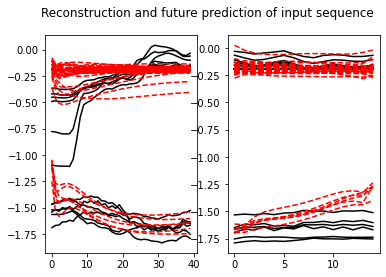

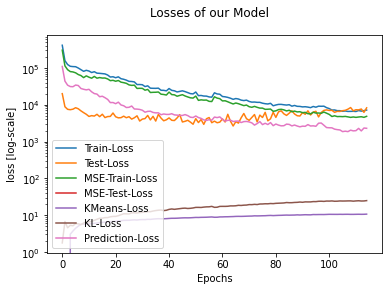

In [153]:
# Step 3:
# Evaluate model
vame.evaluate_model(config, model_name='VAME')

Loading a pretrained model is a little tricky up to this point and we are planning to make this function easier with our next update. To use a pretrained model you have to do the following steps:

Set the arguments pretrained_weights=True and pretrained_model="vame_model.pkl" in the vame.rnn() function to train the network.
As you have already mentioned you have to copy your model into the pretrained_model folder. Make sure that the name of the pretrained model matches the name of the argument string in step 1.
You have to go into your config.yaml and set the hyperparameter kl_start=0 and annealtime=1
Now, if you run the function vame.rnn() you should see something like this in your console:
Train RNN model!
Using CUDA
GPU active: True
GPU used: Quadro RTX 5000
Latent Dimensions: 10, Beta: 1, lr: 0.0008
Loading pretrained Model: vame_model
Initialize train data. Datapoints 1306914
Epoch: 1. loss: 65.9462

The model prints that its using a pretrained model.

Now its time to let the model infer the underlying behavioral structure of your data. This step will load your trained model and set it to inference mode. Here, only the trained encoder is used to infer the latent state structure from which in a second step the k-Means cluster will be segmented.

vame.behavior_segmentation(config, model_name='VAME', cluster_method='kmeans', n_cluster=[30])

As usual, the function takes as input your config file as well as the name of the model. There are two more parameters you can control. The first one is the cluster_method which is by default set to kmeans. **It is however possible to use a Gaussian mixture model to cluster from the latent state vector by setting cluster_method='GMM'**. We recommend to leave the kmeans setting for now.

The second parameter is a list of behavioral states you want to cluster. E.g. n_cluster=[30] or n_cluster=[15,30,45]. After inferring the latent vectors for every animal this will create a folder in the results part for every behavior video with the cluster size. In this way you can set multiple cluster sizes and later investigate which particular size brings the best results for your experiment.

In our paper we were using 30 behavioral states. This number can be higher or lower, depending on how much data you have at hand to train the model and on how coarse- or fine-grained you want to cluster your behavior. Note, that there will be a trade-off when you set the cluster number too high or too low.

A last important note is that the resulting motif labels are starting at the time_window / 2 frame. This means if you chose time_window = 30, your first motif label is the 15th frame of your video.

In [154]:
# Step 4:
# Quantify Behavior
vame.behavior_segmentation(config, model_name='VAME', cluster_method='kmeans', n_cluster=[5,10,20])
vame.behavior_segmentation(config, model_name='VAME', cluster_method='GMM', n_cluster=[5,10,20])

Using CUDA
GPU active: True
GPU used: GeForce RTX 2080 Ti
Computing latent space for emo_camA 
Computing latent space for emo_camB 
Computing latent space for emo2_camA 
Computing latent space for emo2_camB 
Computing latent space for emo3_camA 
Computing latent space for emo3_camB 
Computing latent space for setup_camA 
Computing latent space for setup_camB 
Behavior segmentation via k-Means for 5 cluster.
Segmentation for file emo_camA...
Segmentation for file emo_camB...
Segmentation for file emo2_camA...
Segmentation for file emo2_camB...
Segmentation for file emo3_camA...
Segmentation for file emo3_camB...
Segmentation for file setup_camA...
Segmentation for file setup_camB...
Behavior segmentation via k-Means for 10 cluster.
Segmentation for file emo_camA...
Segmentation for file emo_camB...
Segmentation for file emo2_camA...
Segmentation for file emo2_camB...
Segmentation for file emo3_camA...
Segmentation for file emo3_camB...
Segmentation for file setup_camA...
Segmentation fo

In [157]:
# Step 5:
# Get behavioral transition matrix, model usage and graph
vame.behavior_quantification(config, model_name='VAME', cluster_method='kmeans', n_cluster=5)
vame.behavior_quantification(config, model_name='VAME', cluster_method='kmeans', n_cluster=10)
vame.behavior_quantification(config, model_name='VAME', cluster_method='kmeans', n_cluster=20)
vame.behavior_quantification(config, model_name='VAME', cluster_method='GMM', n_cluster=5)
vame.behavior_quantification(config, model_name='VAME', cluster_method='GMM', n_cluster=10)
vame.behavior_quantification(config, model_name='VAME', cluster_method='GMM', n_cluster=20)

After segmenting your pose estimation time series into discrete behavioral motifs its time to quantify the behavior in your experiment.

vame.behavior_quantification(config, model_name='VAME', cluster_method='kmeans', n_cluster=30)

This function will give you the distribution of the motif usage and a transition matrix between behavioral motifs. The results will be stored in the results folder for every video.

From here, you can take these results and start doing your own analysis for your experiment. Enjoy!

In [155]:
# work in progress, github issue #11
# Get motif videos:
vame.motif_videos(config, model_name='VAME', cluster_method="kmeans", n_cluster=[5,10,20])

The videowriter from openCV that you use is only looking for mp4 files and is not reporting an error if it entcounters other filetypes, which results in an empty variable that get's further passed down.

First error that happens in line 38 when trying to write the first videos:

 video = cv.VideoWriter(output, cv.VideoWriter_fourcc('M','J','P','G'), fps, (int(width), int(height)))
Error says "fps" is called before assignment.

Most likely origin:

in line:19 vame/analysis/videowriter.py when calling vame.motif_videos()

def get_cluster_vid(cfg, path_to_file, file, n_cluster):
    print("Videos get created for "+file+" ...")
    labels = np.load(path_to_file+'/'+str(n_cluster)+'_km_label_'+file+'.npy')
    --> capture = cv.VideoCapture(cfg['project_path']+'videos/'+file+'.mp4')
    
My workaround:
capture = cv.VideoCapture(cfg['project_path'] + 'videos/' + file + '.avi')

make sure to change videowriter.py file in vame\lib\site-packages\vame-0.1-py3.7.egg\vame\analysis\videowriter.py

# Results section

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

# # n = 5 components

In [165]:
## Check results for kNN n=5
kNN_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-5\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-5\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-5\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-5\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-5\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-5\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-5\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-5\\latent_vector_setup_camB.npy',]

kNN_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-5\\5_km_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-5\\5_km_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-5\\5_km_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-5\\5_km_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-5\\5_km_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-5\\5_km_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-5\\5_km_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-5\\5_km_label_setup_camB.npy',]

kNN_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-5\\behavior_quantification\\motif_usage.npy',]

In [166]:
## Check results for GMM n=5
GMM_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-5\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-5\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-5\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-5\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-5\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-5\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-5\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-5\\latent_vector_setup_camB.npy',]

GMM_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-5\\5_gmm_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-5\\5_gmm_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-5\\5_gmm_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-5\\5_gmm_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-5\\5_gmm_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-5\\5_gmm_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-5\\5_gmm_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-5\\5_gmm_label_setup_camB.npy',]

GMM_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-5\\behavior_quantification\\motif_usage.npy',]

In [161]:
def plot_prediction(data, predictions):
    colors = {"0": "black", "1":"dimgray", "2":"darkgray", "3":"white", "4":"bisque", "5":"tan", "6":"orange", "7":"salmon", "8":"gold", "9":"rosybrown", "10":"beige", "11":"thistle", "12":"peachpuff", "13":"khaki", "14":"skyblue", "15":"lightblue", "16":"lightsteelblue", "17":"lavender", "18":"mediumaquamarine", "19":"cadetblue"}
    n = max(predictions)+1
    name =[x for x in globals() if globals()[x] is data][0]
    yloc = np.max(data)-(np.max(data) - np.min(data))/8
    locy = yloc - (np.max(data) - np.min(data))/8
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(data)
    start_pred = 0
    for i in range(len(predictions)):
        if i == len(predictions)-1:
            end_pred = i+1
            ax.axvspan(start_pred,end_pred, facecolor=colors["%d" %predictions[i]], alpha = 0.5)
            loc = start_pred + (end_pred - start_pred)/2
            ax.annotate('%d'%predictions[i], xy=(loc, locy), xytext=(loc+10, yloc),
            arrowprops=dict(arrowstyle="->", facecolor='black'))
        elif predictions[i] == predictions[i+1]:
            pass
        else:
            end_pred = i
            ax.axvspan(start_pred,end_pred, facecolor=colors["%d" %predictions[i]], alpha = 0.5)
            loc = start_pred + (end_pred - start_pred)/2
            ax.annotate('%d'%predictions[i], xy=(loc, locy), xytext=(loc+10, yloc),
            arrowprops=dict(arrowstyle="->", facecolor='black'))
            start_pred = end_pred
        
    plt.xlabel("Time [frames]")
    plt.ylabel("Feature value from %s data" %name)
    plt.title('Predictions from VAME with N = %d Components' %n)
    plt.show()
    return

kNN classification of vame


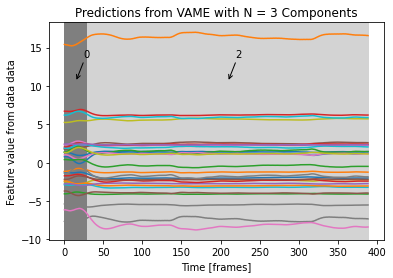

kNN classification of vame


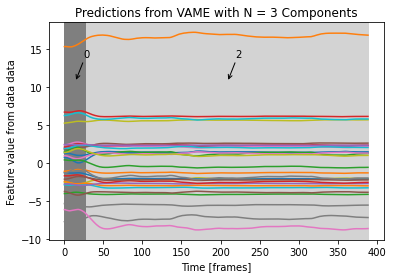

kNN classification of vame


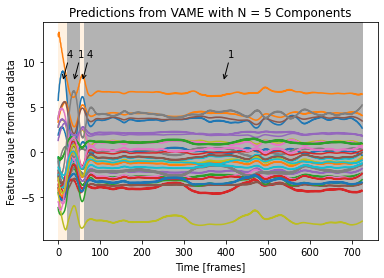

kNN classification of vame


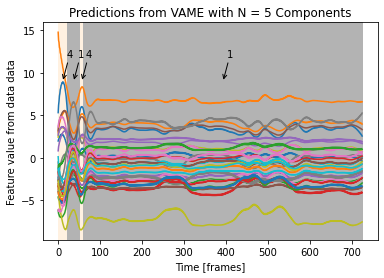

kNN classification of vame


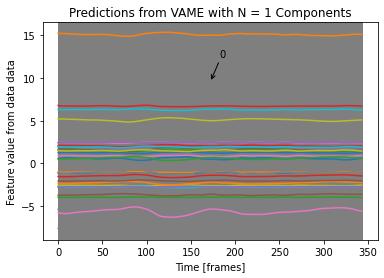

kNN classification of vame


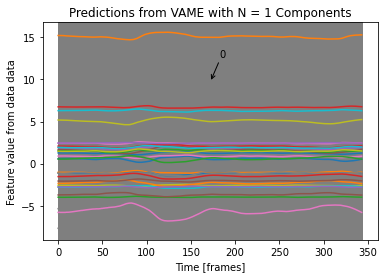

kNN classification of vame


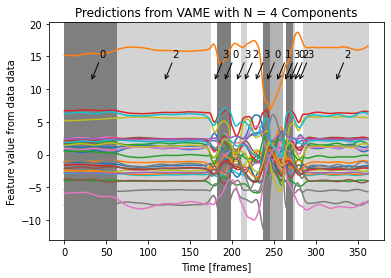

kNN classification of vame


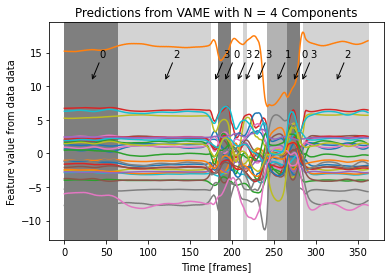

In [167]:
for i in range(len(kNN_labels)):
    print('kNN classification of vame')
    data = np.load(kNN_results[i])
    predictions = np.load(kNN_labels[i])
    plot_prediction(data, predictions)

GMM classification of vame


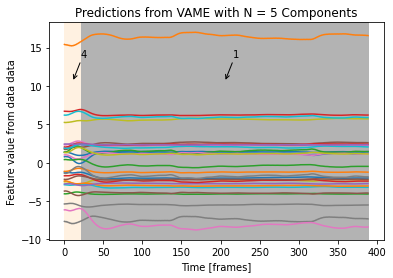

GMM classification of vame


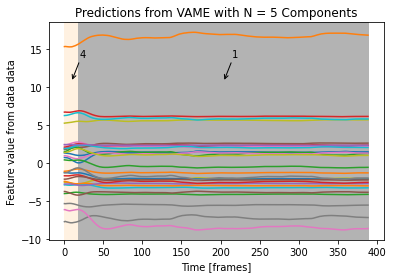

GMM classification of vame


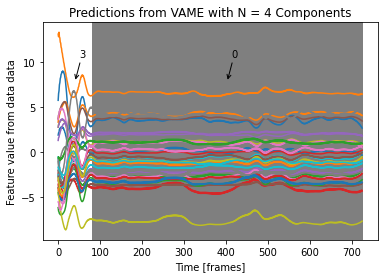

GMM classification of vame


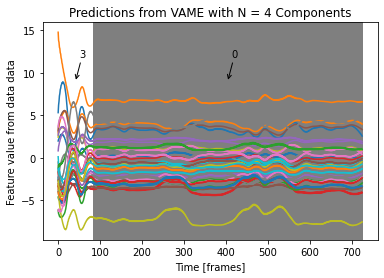

GMM classification of vame


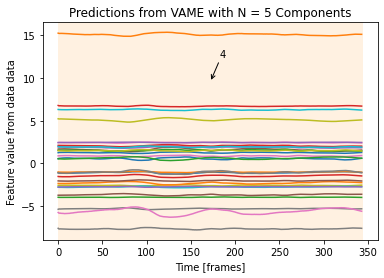

GMM classification of vame


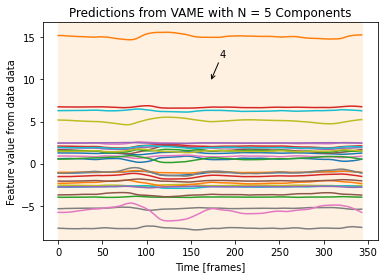

GMM classification of vame


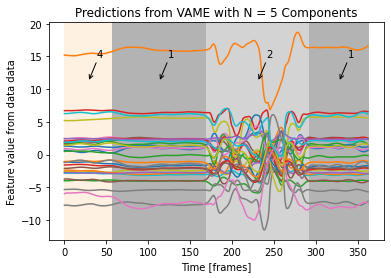

GMM classification of vame


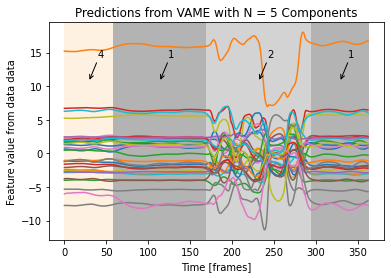

In [168]:
for i in range(len(GMM_labels)):
    print('GMM classification of vame')
    data = np.load(GMM_results[i])
    predictions = np.load(GMM_labels[i])
    plot_prediction(data, predictions)

kNN classification of vame


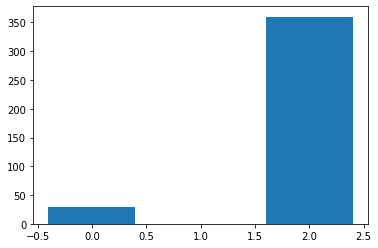

[ 30   0 360]
kNN classification of vame


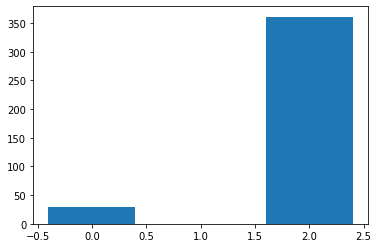

[ 29   0 361]
kNN classification of vame


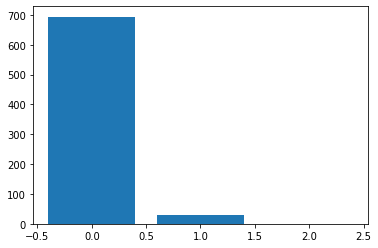

[694  31   0]
kNN classification of vame


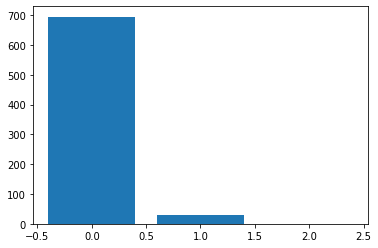

[695  30   0]
kNN classification of vame


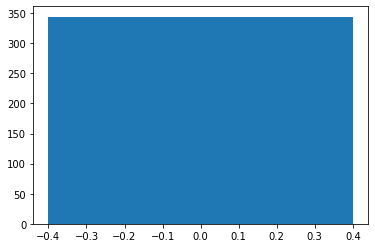

[344]
kNN classification of vame


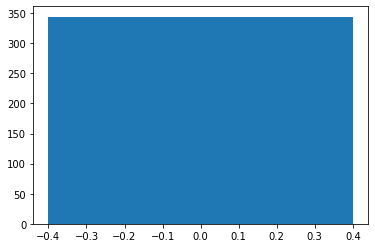

[344]
kNN classification of vame


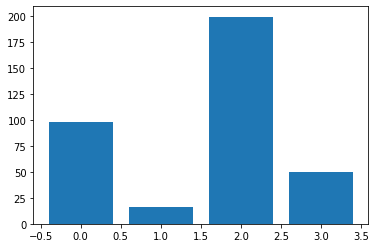

[ 98  16 199  50]
kNN classification of vame


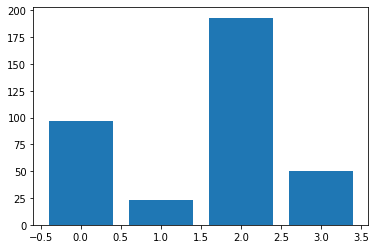

[ 97  23 193  50]


In [171]:
for i in range(len(kNN_quantification)):
    print('kNN classification of vame')
    data = np.load(kNN_quantification[i])
    motifs = [0,1,2,3,4]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)
    

GMM classification of vame


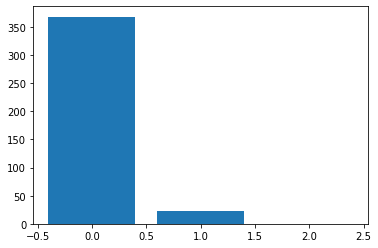

[368  22   0]
GMM classification of vame


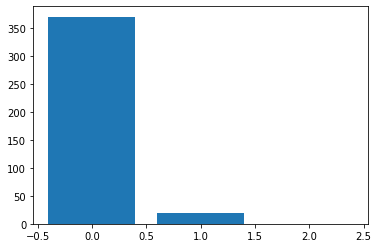

[371  19   0]
GMM classification of vame


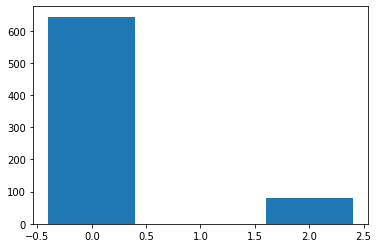

[644   0  81]
GMM classification of vame


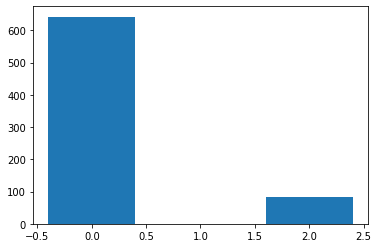

[642   0  83]
GMM classification of vame


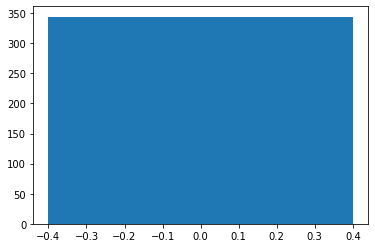

[344]
GMM classification of vame


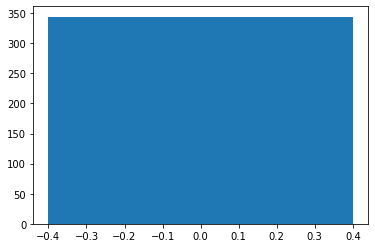

[344]
GMM classification of vame


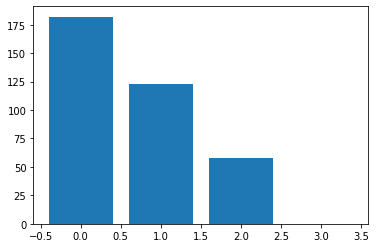

[182 123  58   0]
GMM classification of vame


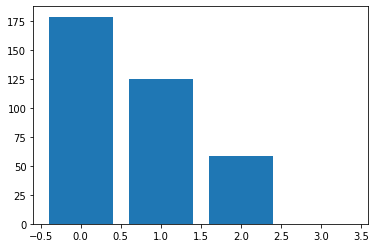

[179 125  59   0]


In [172]:
for i in range(len(GMM_quantification)):
    print('GMM classification of vame')
    data = np.load(GMM_quantification[i])
    motifs = [0,1,2,3,4]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)

# # n = 10 components

In [173]:
## Check results for kNN n=10
kNN_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-10\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-10\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-10\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-10\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-10\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-10\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-10\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-10\\latent_vector_setup_camB.npy',]

kNN_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-10\\10_km_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-10\\10_km_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-10\\10_km_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-10\\10_km_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-10\\10_km_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-10\\10_km_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-10\\10_km_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-10\\10_km_label_setup_camB.npy',]

kNN_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-10\\behavior_quantification\\motif_usage.npy',]

In [174]:
## Check results for GMM n=10
GMM_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-10\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-10\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-10\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-10\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-10\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-10\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-10\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-10\\latent_vector_setup_camB.npy',]

GMM_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-10\\10_gmm_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-10\\10_gmm_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-10\\10_gmm_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-10\\10_gmm_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-10\\10_gmm_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-10\\10_gmm_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-10\\10_gmm_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-10\\10_gmm_label_setup_camB.npy',]

GMM_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-10\\behavior_quantification\\motif_usage.npy',]

kNN classification of vame


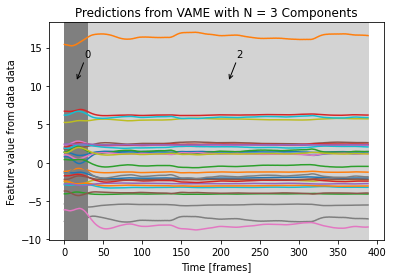

kNN classification of vame


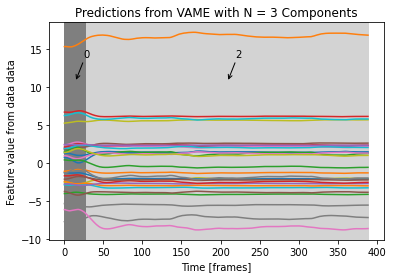

kNN classification of vame


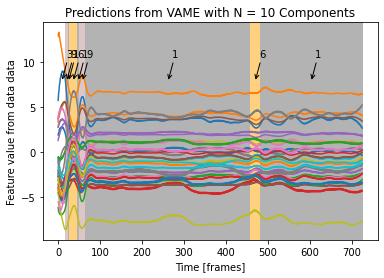

kNN classification of vame


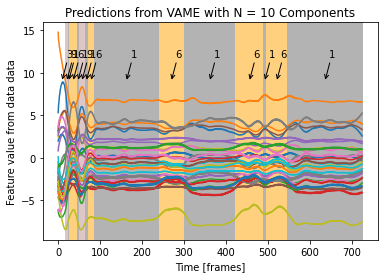

kNN classification of vame


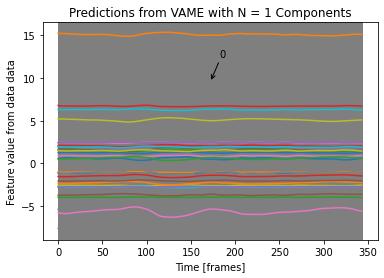

kNN classification of vame


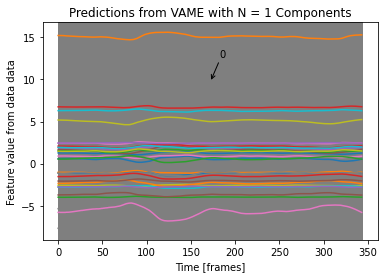

kNN classification of vame


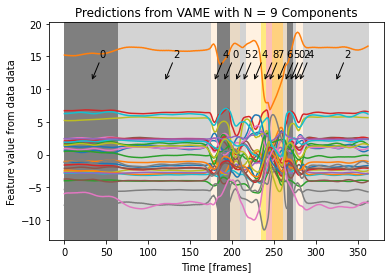

kNN classification of vame


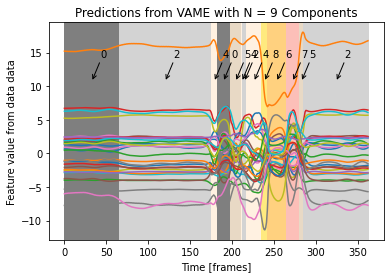

In [175]:
for i in range(len(kNN_labels)):
    print('kNN classification of vame')
    data = np.load(kNN_results[i])
    predictions = np.load(kNN_labels[i])
    plot_prediction(data, predictions)

GMM classification of vame


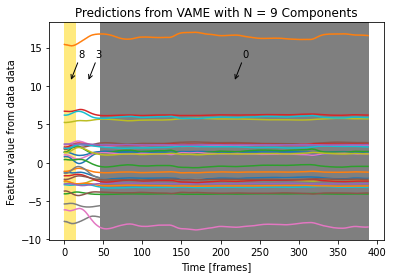

GMM classification of vame


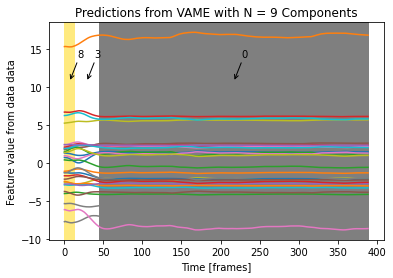

GMM classification of vame


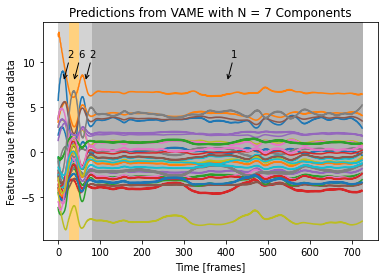

GMM classification of vame


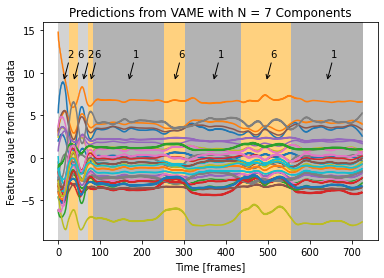

GMM classification of vame


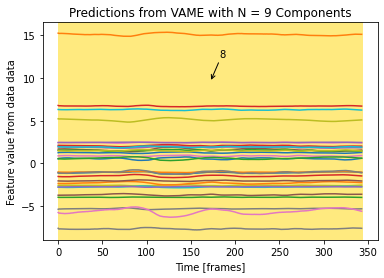

GMM classification of vame


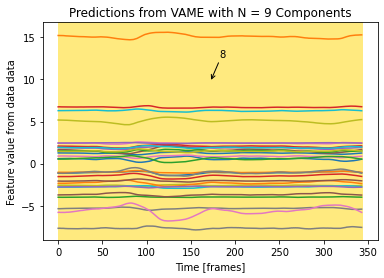

GMM classification of vame


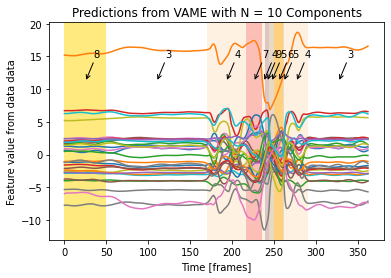

GMM classification of vame


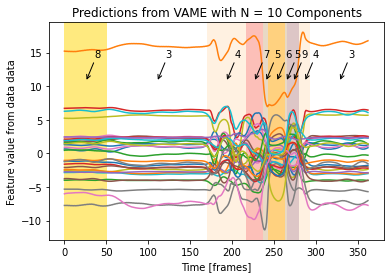

In [176]:
for i in range(len(GMM_labels)):
    print('GMM classification of vame')
    data = np.load(GMM_results[i])
    predictions = np.load(GMM_labels[i])
    plot_prediction(data, predictions)

kNN classification of vame


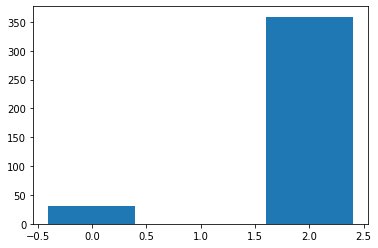

[ 31   0 359]
kNN classification of vame


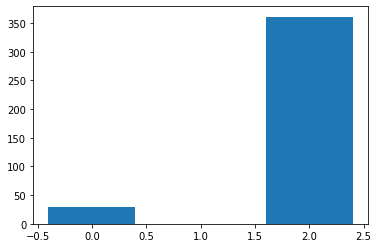

[ 29   0 361]
kNN classification of vame


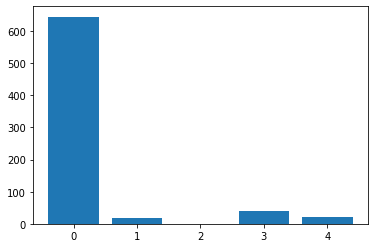

[645  18   0  41  21]
kNN classification of vame


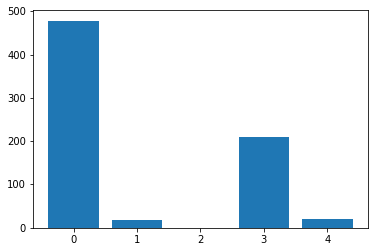

[478  18   0 209  20]
kNN classification of vame


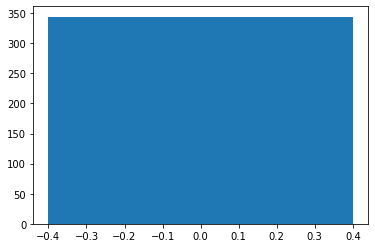

[344]
kNN classification of vame


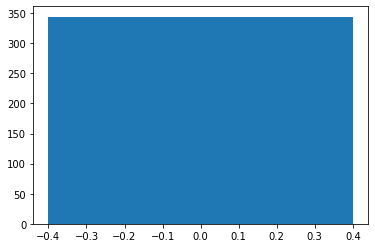

[344]
kNN classification of vame


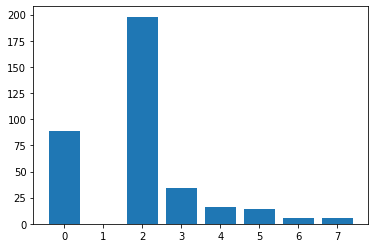

[ 89   0 198  34  16  14   6   6]
kNN classification of vame


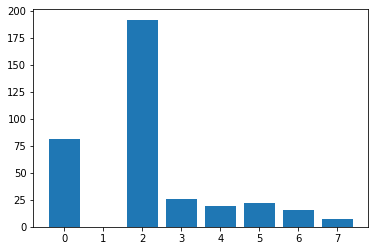

[ 81   0 192  26  19  22  16   7]


In [179]:
for i in range(len(kNN_quantification)):
    print('kNN classification of vame')
    data = np.load(kNN_quantification[i])
    motifs = [0,1,2,3,4,5,6,7,8,9]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)
    

GMM classification of vame


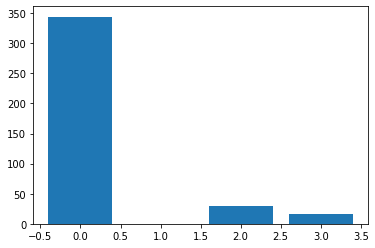

[344   0  30  16]
GMM classification of vame


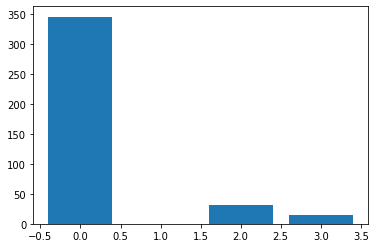

[345   0  31  14]
GMM classification of vame


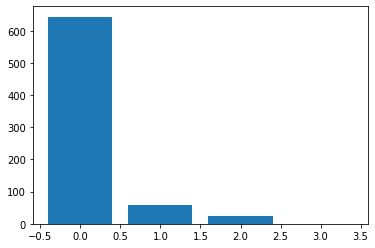

[644  57  24   0]
GMM classification of vame


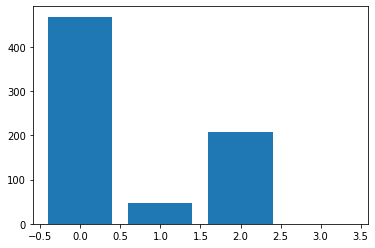

[469  48 208   0]
GMM classification of vame


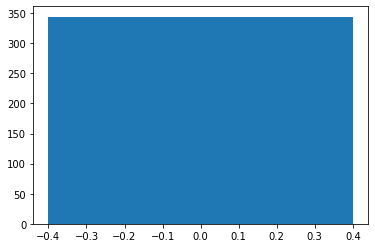

[344]
GMM classification of vame


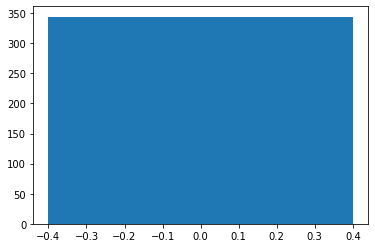

[344]
GMM classification of vame


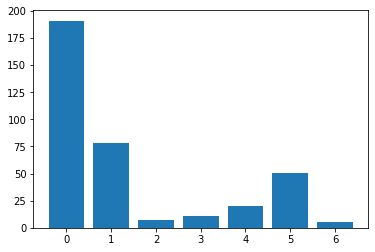

[191  78   7  11  20  51   5]
GMM classification of vame


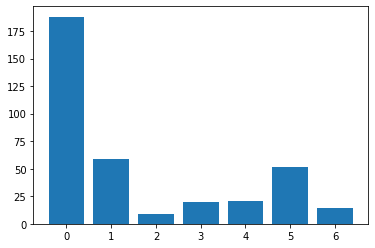

[188  59   9  20  21  52  14]


In [178]:
for i in range(len(GMM_quantification)):
    print('GMM classification of vame')
    data = np.load(GMM_quantification[i])
    motifs = [0,1,2,3,4,5,6,7,8,9]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)

# # n = 20 components

In [181]:
## Check results k = 20
kNN_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-20\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-20\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-20\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-20\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-20\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-20\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-20\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-20\\latent_vector_setup_camB.npy',]

kNN_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-20\\20_km_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-20\\20_km_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-20\\20_km_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-20\\20_km_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-20\\20_km_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-20\\20_km_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-20\\20_km_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-20\\20_km_label_setup_camB.npy',]

kNN_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\kmeans-20\\behavior_quantification\\motif_usage.npy',]

In [182]:
## Check results k = 20
GMM_results = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-20\\latent_vector_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-20\\latent_vector_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-20\\latent_vector_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-20\\latent_vector_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-20\\latent_vector_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-20\\latent_vector_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-20\\latent_vector_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-20\\latent_vector_setup_camB.npy',]

GMM_labels = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-20\\20_gmm_label_emo_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-20\\20_gmm_label_emo_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-20\\20_gmm_label_emo2_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-20\\20_gmm_label_emo2_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-20\\20_gmm_label_emo3_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-20\\20_gmm_label_emo3_camB.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-20\\20_gmm_label_setup_camA.npy',
           'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-20\\20_gmm_label_setup_camB.npy',]

GMM_quantification = ['D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camA\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo_camB\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camA\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo2_camB\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camA\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\emo3_camB\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camA\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',
                 'D:\\VAME\\Emoface_kNN_GMM-Nov10-2020\\results\\setup_camB\\VAME\\GMM-20\\behavior_quantification\\motif_usage.npy',]

kNN classification of vame


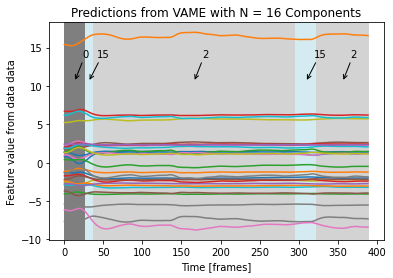

kNN classification of vame


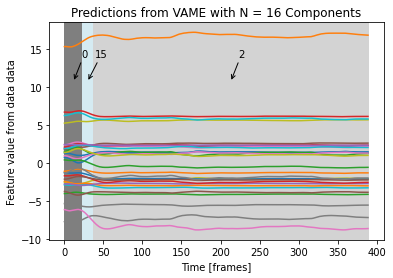

kNN classification of vame


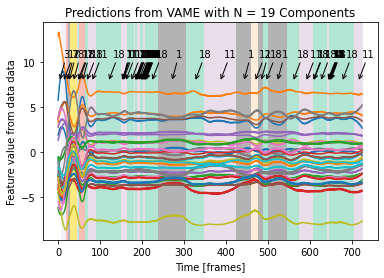

kNN classification of vame


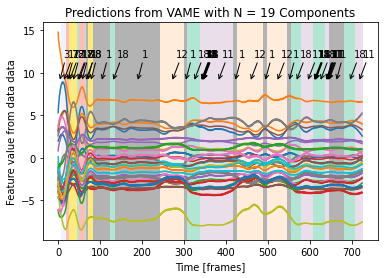

kNN classification of vame


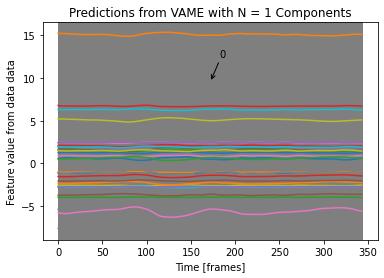

kNN classification of vame


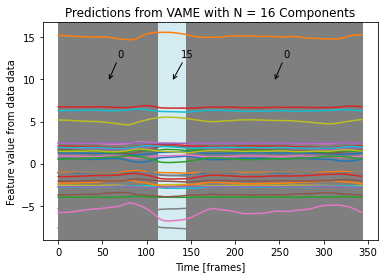

kNN classification of vame


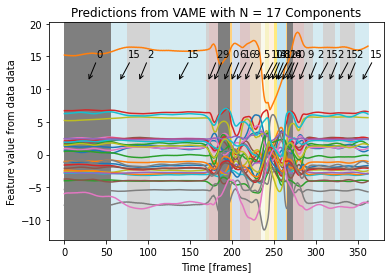

kNN classification of vame


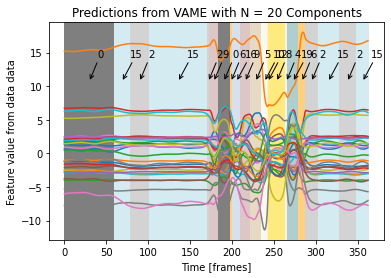

In [183]:
for i in range(len(kNN_labels)):
    print('kNN classification of vame')
    data = np.load(kNN_results[i])
    predictions = np.load(kNN_labels[i])
    plot_prediction(data, predictions)

GMM classification of vame


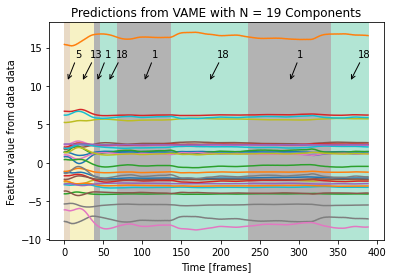

GMM classification of vame


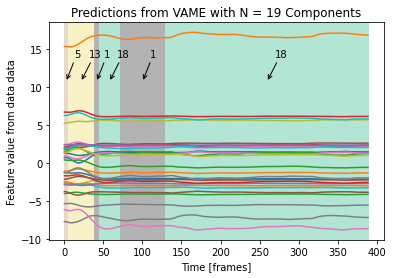

GMM classification of vame


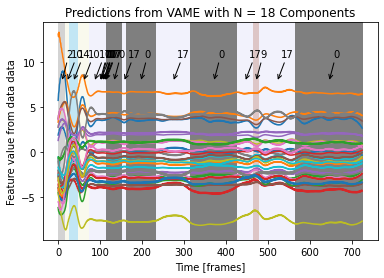

GMM classification of vame


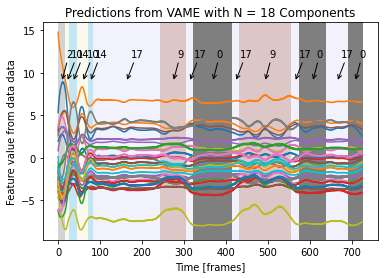

GMM classification of vame


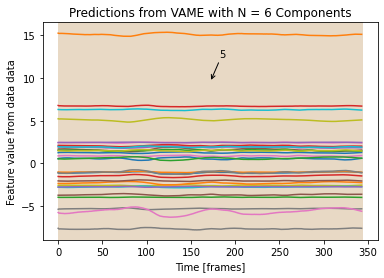

GMM classification of vame


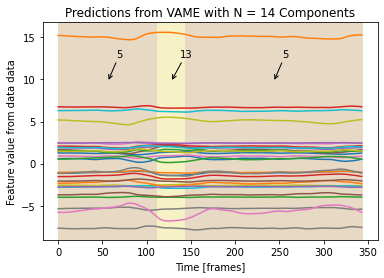

GMM classification of vame


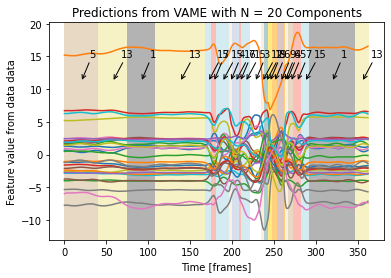

GMM classification of vame


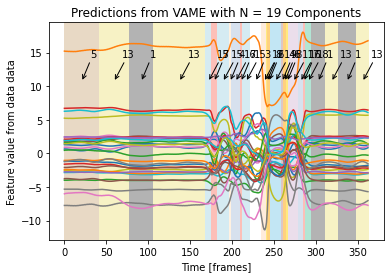

In [184]:
for i in range(len(GMM_labels)):
    print('GMM classification of vame')
    data = np.load(GMM_results[i])
    predictions = np.load(GMM_labels[i])
    plot_prediction(data, predictions)

kNN classification of vame


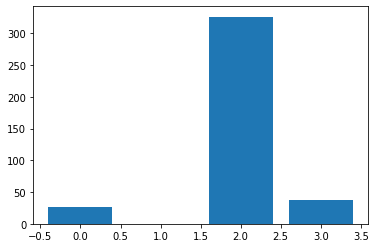

[ 27   0 326  37]
kNN classification of vame


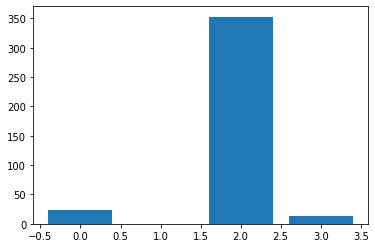

[ 24   0 353  13]
kNN classification of vame


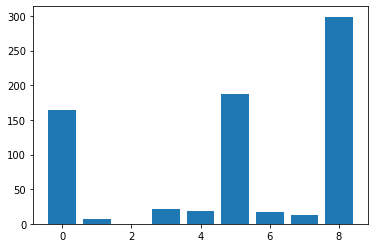

[164   7   0  21  18 187  17  12 299]
kNN classification of vame


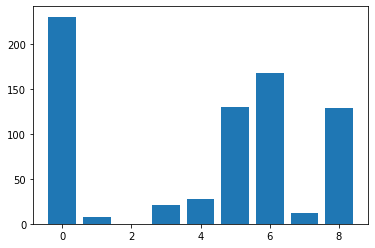

[230   7   0  21  28 130 168  12 129]
kNN classification of vame


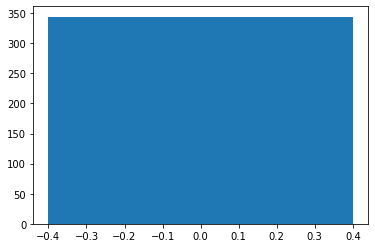

[344]
kNN classification of vame


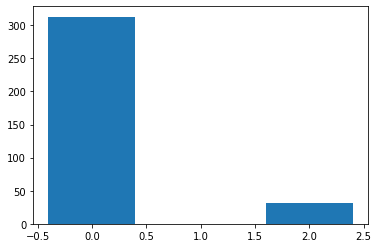

[313   0  31]
kNN classification of vame


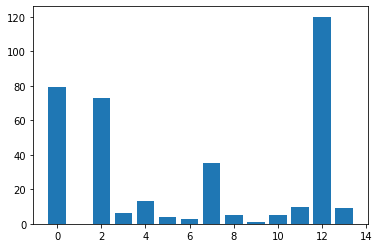

[ 79   0  73   6  13   4   3  35   5   1   5  10 120   9]
kNN classification of vame


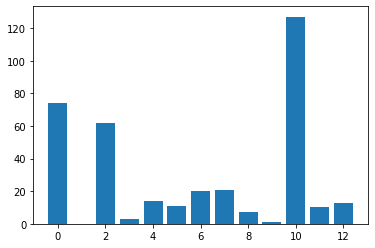

[ 74   0  62   3  14  11  20  21   7   1 127  10  13]


In [185]:
for i in range(len(kNN_quantification)):
    print('kNN classification of vame')
    data = np.load(kNN_quantification[i])
    motifs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)

GMM classification of vame


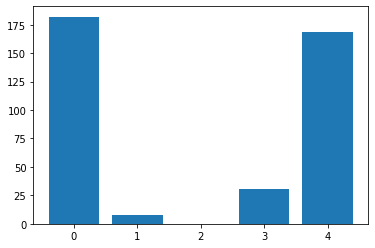

[182   8   0  31 169]
GMM classification of vame


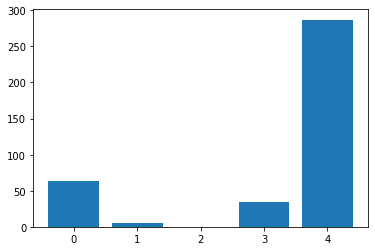

[ 64   5   0  34 287]
GMM classification of vame


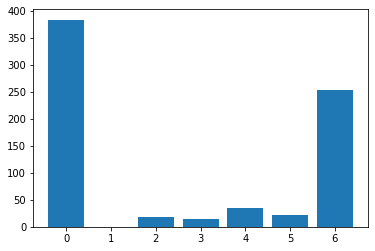

[384   0  18  14  34  22 253]
GMM classification of vame


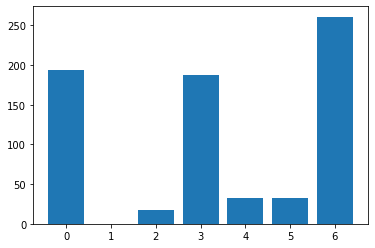

[194   0  18 187  33  32 261]
GMM classification of vame


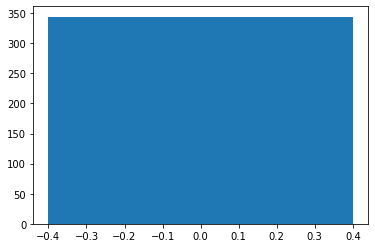

[344]
GMM classification of vame


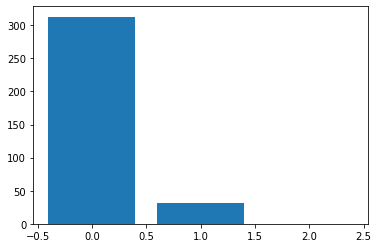

[313  31   0]
GMM classification of vame


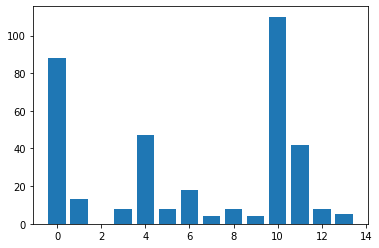

[ 88  13   0   8  47   8  18   4   8   4 110  42   8   5]
GMM classification of vame


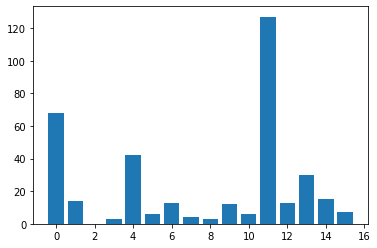

[ 68  14   0   3  42   6  13   4   3  12   6 127  13  30  15   7]


In [186]:
for i in range(len(GMM_quantification)):
    print('GMM classification of vame')
    data = np.load(GMM_quantification[i])
    motifs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    used_motifs = motifs[0:len(data)]
    plt.bar(used_motifs,data);
    plt.show()
    print(data)